In [2]:
import numpy as np
import re
import sys, os, git # , lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [4]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [5]:
def extract_matrices(file_path):
    with open(file_path, 'r') as file:
        content = file.readlines()
    pattern = re.compile(r'^\s*(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(-?[\d.]+)\s+([\d.]+)\s*$')
    matrices = []
    current_matrix = []
    for line in content:
        match = pattern.match(line)
        if match:
            row = [float(match.group(i)) if i != 1 else int(match.group(i)) for i in range(1, 7)]
            current_matrix.append(row)
        elif current_matrix:
            matrices.append(current_matrix)
            current_matrix = []
    if current_matrix:
        matrices.append(current_matrix)
    return matrices

In [6]:
# For some reason, lammps_logfile does not work, so a custom script is used
file_path = "mixing.log"
data_matrixes = extract_matrices(file_path)

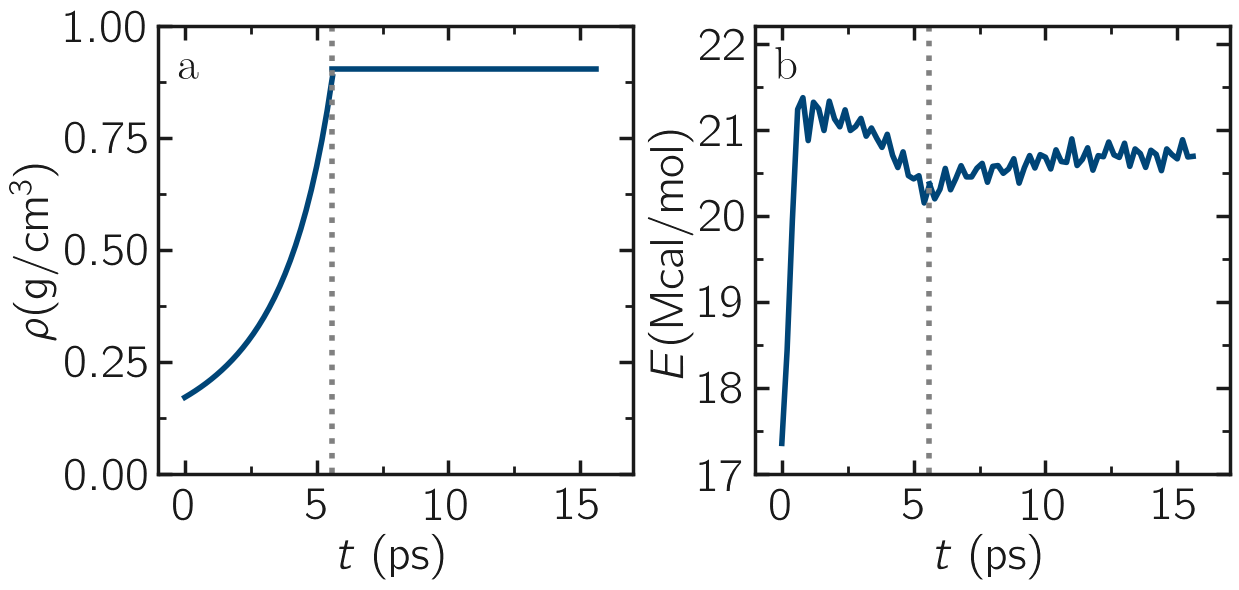

In [9]:
filename = "REACT-mixing"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12.5,6.), dark_mode = False,
                    transparency = False, use_serif=False, n_colone=2)

myplt.add_panel()
myplt.add_plot(x = np.array(data_matrixes[0])[:,0]/1000,
               y =  np.array(data_matrixes[0])[:,5],
               type = "plot", linewidth_data = 3,
               marker = "-", data_color = 2, markersize = 12)
myplt.add_plot(x = np.array(data_matrixes[1])[:,0]/1000+np.max(np.array(data_matrixes[0])[:,0])/1000,
               y =  np.array(data_matrixes[1])[:,5],
               type = "plot", linewidth_data = 3,
               marker = "-", data_color = 2, markersize = 12)
x = np.linspace(-1000, 1000)
myplt.add_plot(x = x*0+5.6, y = x, type = "plot", linewidth_data = 1.5,
               marker = ":", data_color = color4, markersize = 12)
myplt.set_boundaries(x_boundaries=(-1, 17), x_ticks=np.arange(0, 15.1, 5),
                     y_boundaries=(0, 1), y_ticks=np.arange(0, 1.01, 0.25))
myplt.complete_panel(ylabel = r'$\rho (\mathrm{g}/\mathrm{cm}^3)$',
                     xlabel = r'$t ~ \mathrm{(ps)}$',
                     xpad = 10, legend=False, handlelength_legend=1)

myplt.add_panel()
myplt.add_plot(x = np.array(data_matrixes[0])[:,0]/1000,
               y =  np.array(data_matrixes[0])[:,3]/1000,
               type = "plot", linewidth_data = 3,
               marker = "-", data_color = 2, markersize = 12)
myplt.add_plot(x = np.array(data_matrixes[1])[:,0]/1000+np.max(np.array(data_matrixes[0])[:,0])/1000,
               y =  np.array(data_matrixes[1])[:,3]/1000,
               type = "plot", linewidth_data = 3,
               marker = "-", data_color = 2, markersize = 12)
x = np.linspace(-1000, 1000)
myplt.add_plot(x = x*0+5.6, y = x, type = "plot", linewidth_data = 1.5,
               marker = ":", data_color = color4, markersize = 12)
myplt.set_boundaries(x_boundaries=(-1, 17), x_ticks=np.arange(0, 15.1, 5),
                     y_boundaries=(17, 22.2), y_ticks=np.arange(17, 22.1, 1))
myplt.complete_panel(ylabel = r'$E (\mathrm{Mcal}/\mathrm{mol})$',
                     xlabel = r'$t ~ \mathrm{(ps)}$',
                     xpad = 10, legend=False, handlelength_legend=1)

myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)